First Problem - Exercise Recognition

In [24]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import matplotlib.patches as patches

import xgboost as xgb

In [25]:
X_train = joblib.load("Data/Xtrain1.pkl")
Y_train = np.load('Data/Ytrain1.npy')
print(X_train.shape)
print(Y_train.shape)

(700, 2)
(700,)


In [26]:
print(X_train)

     Patient_Id                                  Skeleton_Features
158           8  [0.01672805172463768, -0.5662699523188407, 0.0...
500          12  [0.03123780159177354, -0.5718956396, 0.0479631...
396           6  [0.023674554394231464, -0.5588386275217391, 0....
155           8  [0.009414516641025642, -0.5693782186153847, 0....
321           3  [0.015847331331651126, -0.5660038876666666, 0....
..          ...                                                ...
71            4  [0.00865563444, -0.5576752849466667, 0.0242797...
106           6  [0.017996815525, -0.5546415622, 0.032668157291...
270          14  [-0.06093925460784313, -0.5421445670294118, -0...
435           8  [-0.009460545267441861, -0.5828924643604652, 0...
102           6  [0.014680226106557379, -0.5484173288196722, 0....

[700 rows x 2 columns]


In [27]:
patient_ids = X_train["Patient_Id"].values
X_train = np.vstack(X_train["Skeleton_Features"].values)

In [28]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)  
print("patient_ids shape:", patient_ids.shape) 

X_train shape: (700, 132)
Y_train shape: (700,)
patient_ids shape: (700,)


In [29]:
connections = {
    'trunk': [(11, 12), (11, 23), (12, 24), (23, 24)],
    'right_arm': [(12, 14), (14, 16), (22, 16), (20, 16), (20, 18), (18, 16)],
    'left_arm': [(11, 13), (13, 15), (21, 15), (15, 19), (19, 17), (17, 15)],
    'right_leg': [(23, 25), (25, 27), (27, 31), (31, 29), (29, 27)],
    'left_leg': [(24, 26), (26, 28), (28, 30), (30, 32), (28, 32)]
}

colors = {
    'trunk': 'blue',
    'right_arm': 'red',
    'left_arm': 'green',
    'right_leg': 'orange',
    'left_leg': 'purple'
}

head_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

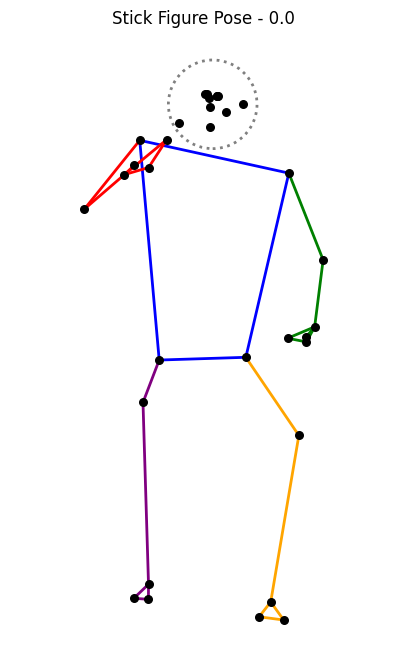

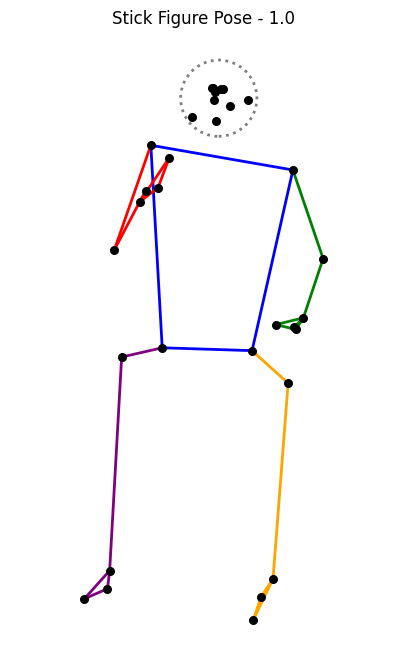

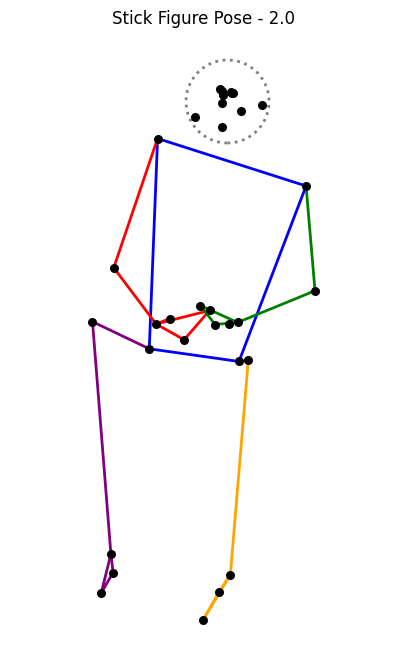

In [30]:
examples = [0, 4, 10]

for idx in examples:
    sample = X_train[idx]

    # Split into mean and std
    mean_coords = sample[:66]
    std_coords = sample[66:]

    # Extract x and y of 33 keypoints
    x = mean_coords[0::2]  # even indices
    y = mean_coords[1::2]  # odd indices

    # Get head points
    head_x = x[head_indices]
    head_y = -y[head_indices]  # use -y if you invert y in your plot

    # Calculate center as mean of head points
    center_x = head_x.mean()
    center_y = head_y.mean()

    # Calculate radius as max distance from center to any head point
    radius = np.max(np.sqrt((head_x - center_x)**2 + (head_y - center_y)**2)) * 1.15  # 1.15 for padding

    fig, ax = plt.subplots(figsize=(5, 8))

    # Plot segments
    for part, segs in connections.items():
        for a, b in segs:
            ax.plot([x[a], x[b]], [-y[a], -y[b]], c=colors[part], lw=2)

    # Plot joints
    ax.scatter(x, -y, c='black', s=30, zorder=2)

    # Draw head circle
    circle = patches.Circle((center_x, center_y), radius, fill=False, linestyle='dotted', edgecolor='gray', lw=2)
    ax.add_patch(circle)

    ax.set_title(f"Stick Figure Pose - {Y_train[idx]}")
    ax.axis('equal')
    ax.axis('off')
    plt.show()

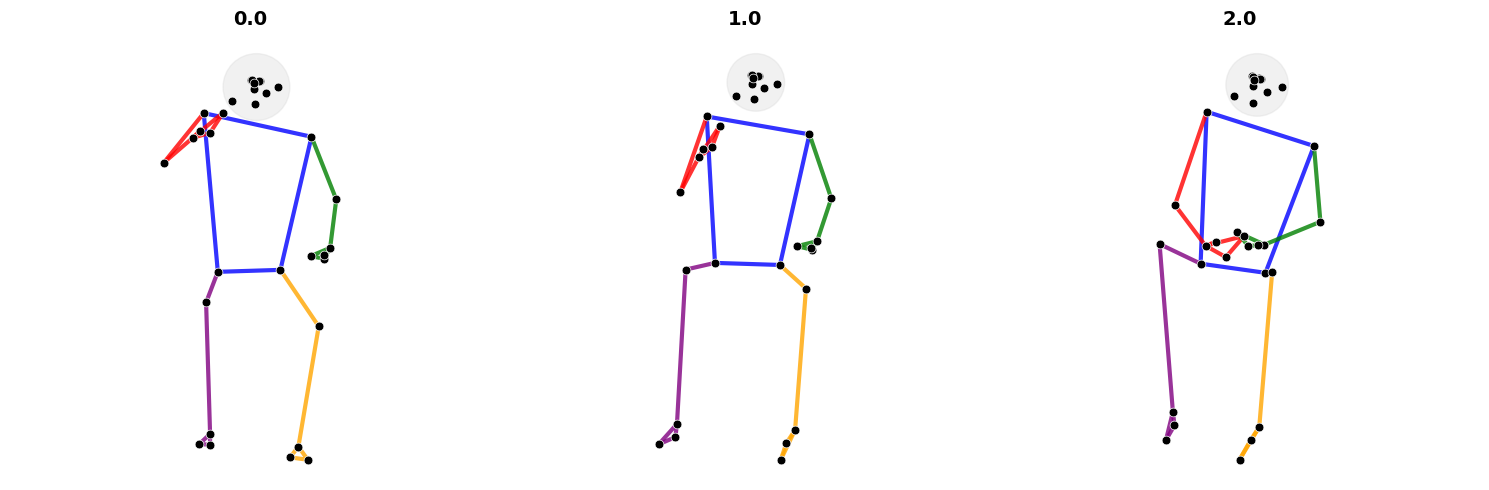

In [31]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def plot_skeletons(samples, labels, connections, colors, head_indices, figsize=(12,5)):
    n = len(samples)
    fig, axes = plt.subplots(1, n, figsize=figsize)
    if n == 1:
        axes = [axes]  # garante lista mesmo para 1 figura

    for ax, sample, label in zip(axes, samples, labels):
        mean_coords = sample[:66]
        x = mean_coords[0::2]
        y = mean_coords[1::2]

        # Head circle
        head_x = x[head_indices]
        head_y = -y[head_indices]
        center_x, center_y = head_x.mean(), head_y.mean()
        radius = np.max(np.sqrt((head_x - center_x)**2 + (head_y - center_y)**2)) * 1.2

        # Plot segments com cores e transparência
        for part, segs in connections.items():
            for a, b in segs:
                ax.plot([x[a], x[b]], [-y[a], -y[b]], c=colors.get(part,'#1f77b4'), lw=3, alpha=0.8)

        # Plot joints
        ax.scatter(x, -y, c='black', s=40, zorder=3, edgecolors='white', linewidth=0.5)

        # Head preenchida semi-transparente
        circle = patches.Circle((center_x, center_y), radius, fill=True, color='lightgray', alpha=0.3)
        ax.add_patch(circle)

        # Estilo do eixo
        ax.set_title(f"{label}", fontsize=14, fontweight='bold')
        ax.axis('equal')
        ax.axis('off')
        ax.set_facecolor('#f9f9f9')

    plt.tight_layout()
    plt.show()


examples = [0, 4, 10]
plot_skeletons(
    samples=[X_train[i] for i in examples],
    labels=[Y_train[i] for i in examples],
    connections=connections,
    colors=colors,
    head_indices=head_indices,
    figsize=(15,5)
)


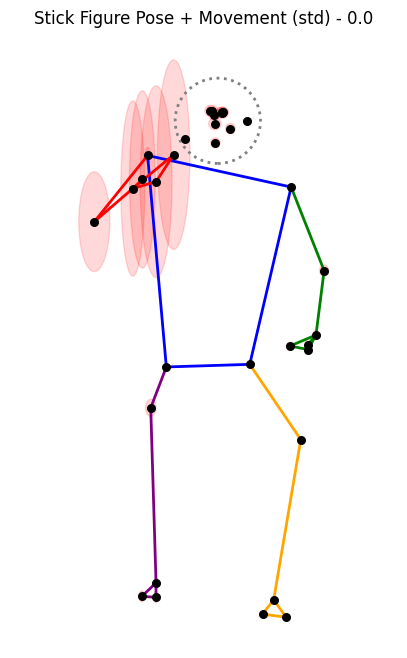

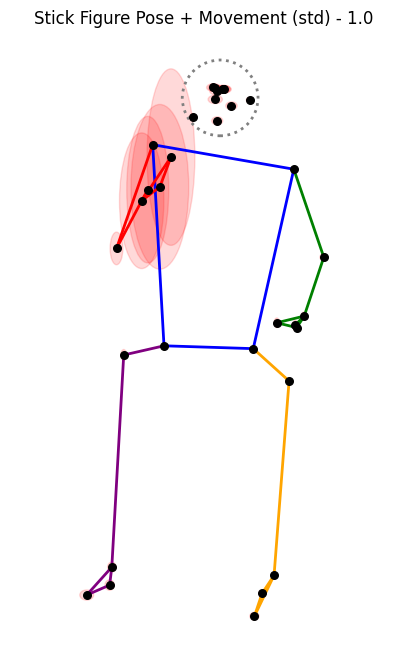

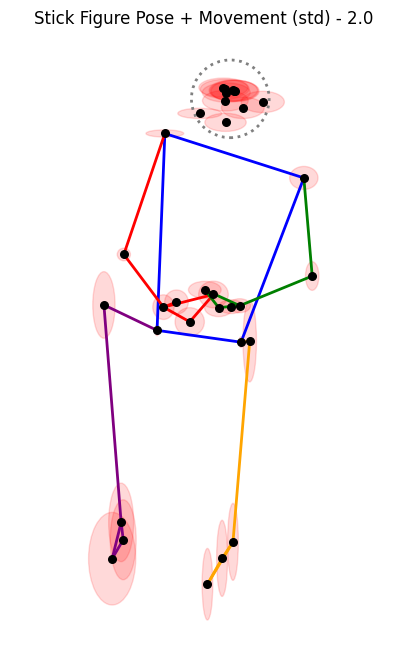

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

examples = [0, 4, 10]

for idx in examples:
    sample = X_train[idx]

    # Divide em média e desvio
    mean_coords = sample[:66]
    std_coords = sample[66:]

    x = mean_coords[0::2]
    y = mean_coords[1::2]
    x_std = std_coords[0::2]
    y_std = std_coords[1::2]

    # Calcular cabeça
    head_x = x[head_indices]
    head_y = -y[head_indices]
    center_x = head_x.mean()
    center_y = head_y.mean()
    radius = np.max(np.sqrt((head_x - center_x)**2 + (head_y - center_y)**2)) * 1.15

    fig, ax = plt.subplots(figsize=(5, 8))

    # --- Desenhar segmentos (mean) ---
    for part, segs in connections.items():
        for a, b in segs:
            ax.plot([x[a], x[b]], [-y[a], -y[b]], c=colors[part], lw=2)

    # --- Juntas principais ---
    ax.scatter(x, -y, c='black', s=30, zorder=3, label='Mean Position')

    # --- Desenhar elipses de incerteza (std) ---
    for i in range(len(x)):
        ellipse = patches.Ellipse(
            (x[i], -y[i]),            # centro
            width=x_std[i]*2,         # largura = 2*desvio
            height=y_std[i]*2,        # altura = 2*desvio
            edgecolor='red',
            facecolor='red',
            alpha=0.15,
            lw=1
        )
        ax.add_patch(ellipse)

    # --- Círculo da cabeça ---
    circle = patches.Circle((center_x, center_y), radius,
                            fill=False, linestyle='dotted', edgecolor='gray', lw=2)
    ax.add_patch(circle)

    ax.set_title(f"Stick Figure Pose + Movement (std) - {Y_train[idx]}")
    ax.axis('equal')
    ax.axis('off')
    plt.show()


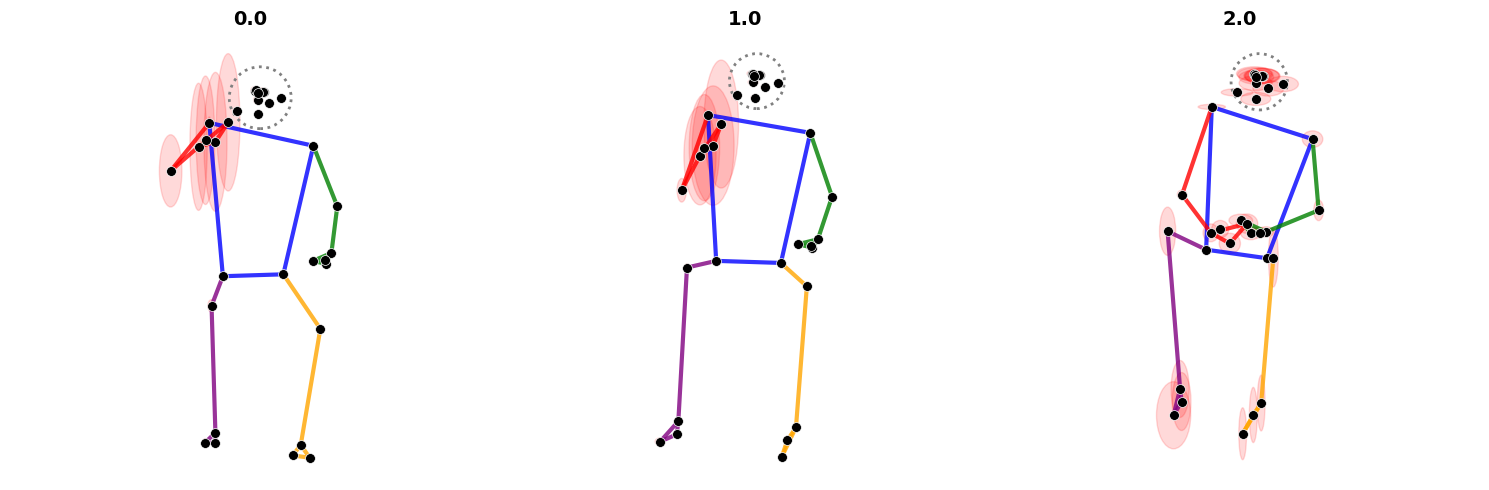

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_skeletons_mean_std(samples, labels, connections, colors, head_indices,
                            figsize=(15,5), alpha_std=0.2, joint_size=40, lw_seg=2):
    """
    Plota múltiplos skeletons lado a lado com posição média e elipses representando desvio padrão.

    Args:
        samples: lista de samples (1D, 132 features cada)
        labels: lista de labels correspondentes
        connections: dict de partes do corpo -> pares de keypoints
        colors: dict de cores por parte
        head_indices: lista de índices dos keypoints da cabeça
        figsize: tamanho da figura
        alpha_std: transparência das elipses de desvio
        joint_size: tamanho dos pontos das juntas
        lw_seg: largura das linhas dos segmentos
    """
    n = len(samples)
    fig, axes = plt.subplots(1, n, figsize=figsize)
    if n == 1:
        axes = [axes]

    for ax, sample, label in zip(axes, samples, labels):
        mean_coords = sample[:66]
        std_coords = sample[66:]

        x = mean_coords[0::2]
        y = mean_coords[1::2]
        x_std = std_coords[0::2]
        y_std = std_coords[1::2]

        # Círculo da cabeça
        head_x = x[head_indices]
        head_y = -y[head_indices]
        center_x, center_y = head_x.mean(), head_y.mean()
        radius = np.max(np.sqrt((head_x - center_x)**2 + (head_y - center_y)**2)) * 1.15

        # Fundo suave
        ax.set_facecolor('#f9f9f9')

        # --- Desenhar segmentos ---
        for part, segs in connections.items():
            for a, b in segs:
                ax.plot([x[a], x[b]], [-y[a], -y[b]],
                        c=colors.get(part,'#1f77b4'),
                        lw=lw_seg, alpha=0.8)

        # --- Juntas (mean) ---
        ax.scatter(x, -y, c='black', s=joint_size, zorder=3, edgecolors='white', linewidth=0.5)

        # --- Elipses de incerteza (std) ---
        for i in range(len(x)):
            ellipse = patches.Ellipse(
                (x[i], -y[i]),
                width=x_std[i]*2,
                height=y_std[i]*2,
                edgecolor='red',
                facecolor='red',
                alpha=alpha_std,
                lw=1
            )
            ax.add_patch(ellipse)

        # --- Círculo da cabeça ---
        circle = patches.Circle(
            (center_x, center_y),
            radius,
            fill=False,
            linestyle='dotted',
            edgecolor='gray',
            lw=2
        )
        ax.add_patch(circle)

        # --- Ajustes finais ---
        ax.set_title(f"{label}", fontsize=14, fontweight='bold')
        ax.axis('equal')
        ax.axis('off')

    plt.tight_layout()
    plt.show()


# ---------------- Example usage ----------------
examples = [0, 4, 10]
plot_skeletons_mean_std(
    samples=[X_train[i] for i in examples],
    labels=[Y_train[i] for i in examples],
    connections=connections,
    colors=colors,
    head_indices=head_indices,
    figsize=(15,5),
    alpha_std=0.15,
    joint_size=50,
    lw_seg=3
)
